In [1]:
!nvidia-smi

Thu Feb 21 14:16:47 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.73       Driver Version: 410.73       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 760     Off  | 00000000:01:00.0 N/A |                  N/A |
| 41%   47C    P8    N/A /  N/A |     26MiB /  4034MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 760     Off  | 00000000:06:00.0 N/A |                  N/A |
| 40%   46C    P8    N/A /  N/A |      1MiB /  4037MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
        

In [2]:
IMG_WIDTH = 1400
IMG_HEIGHT = 1400
ROW_SLICE = slice(0, 1400)
COL_SLICE = slice(1000, None)

In [3]:
import os
import numpy as np
from UNet_inverted_dice import get_unet
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

Using TensorFlow backend.


In [4]:
%matplotlib inline

In [5]:
# ih_data dir
data_dir = "/data/uob/Jordan/"
# deepthought_data_dir
#data_dir = "/storage/yw18581/data"

In [6]:
## Loading data
print("Loading data")

Loading data


In [7]:
X_test = np.load(os.path.join(data_dir,"Xy_test.npz"))

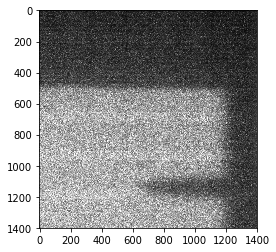

In [24]:
plt.imshow(X_test["x"][0][...,0],cmap='gray')

In [12]:
from keras.models import load_model
from UNet import get_unet

# UNet, 100 epochs, dice coeff with -, adam

In [13]:
model = get_unet()
model.load_weights('/data/uob/trained_models/trained_UNet.hdf5')

In [25]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [26]:
pred.shape

(1, 1400, 1400, 1)

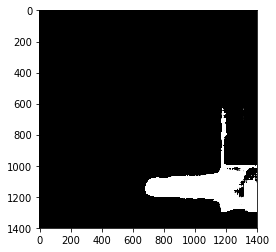

In [27]:
plt.imshow(pred[0,...,0],cmap='gray')

# UNet, 100 epochs, dice coeff with 1-, adam

In [29]:
model = get_unet()
model.load_weights('/data/uob/trained_models/trained_UNet_100epochs_inv_dice.hdf5')

In [30]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [31]:
pred.shape

(1, 1400, 1400, 1)

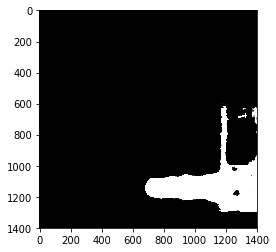

In [32]:
plt.imshow(pred[0,...,0],cmap='gray')

# UNet, 200 epochs, dice coeff with -, adam

In [34]:
model = get_unet()
model.load_weights("/data/uob/trained_models/trained_UNet_200epochs.hdf5")

In [35]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [36]:
pred.shape

(1, 1400, 1400, 1)

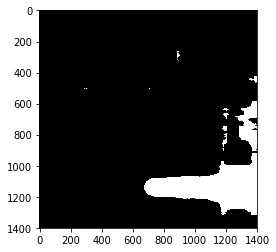

In [37]:
plt.imshow(pred[0,...,0],cmap='gray')

# UNet, 200 epochs, dice coeff with -, rmsprop

In [38]:
model = get_unet()
model.load_weights('/data/uob/trained_models/trained_UNet_200epochs_rmsprop.hdf5')

In [39]:
pred = model.predict(X_test["x"][0][np.newaxis,...])

In [40]:
pred.shape

(1, 1400, 1400, 1)

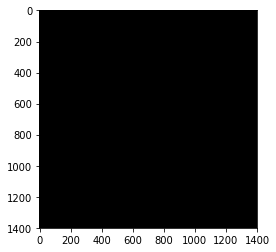

In [41]:
plt.imshow(pred[0,...,0],cmap='gray')